In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
picture1 = cv2.imread('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
picture1_RGB = cv2.cvtColor(picture1,cv2.COLOR_BGR2RGB)
picture2 = cv2.cvtColor(picture1_RGB, cv2.COLOR_RGB2HSV_FULL)

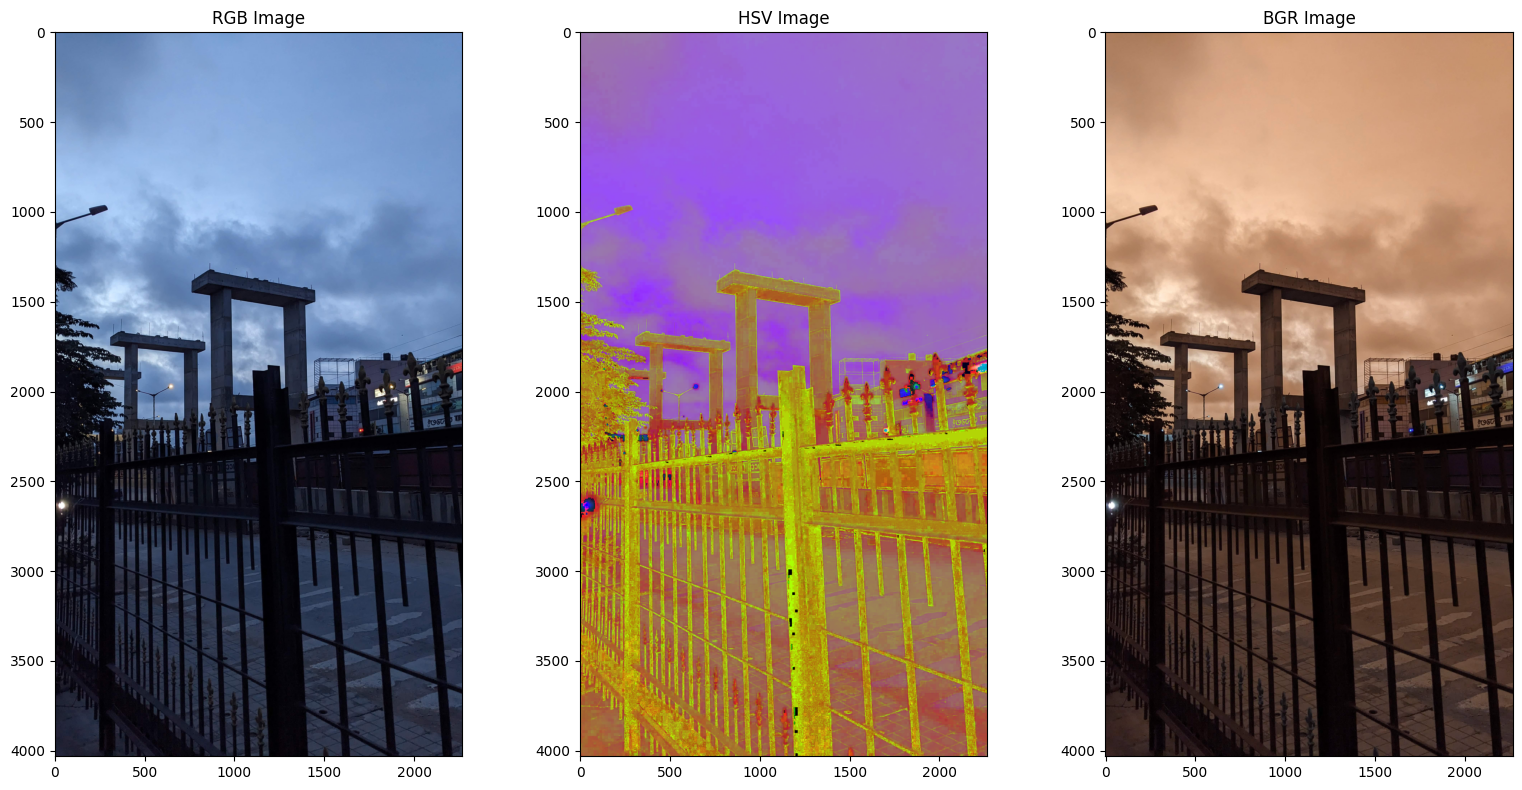

In [3]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.imshow(picture1_RGB)
plt.title('RGB Image')

plt.subplot(1,3,2)
plt.title('HSV Image')
plt.imshow(picture2)

plt.subplot(1,3,3)
plt.title('BGR Image')
plt.imshow(picture1)

plt.tight_layout()
plt.show()

### HSV Plot

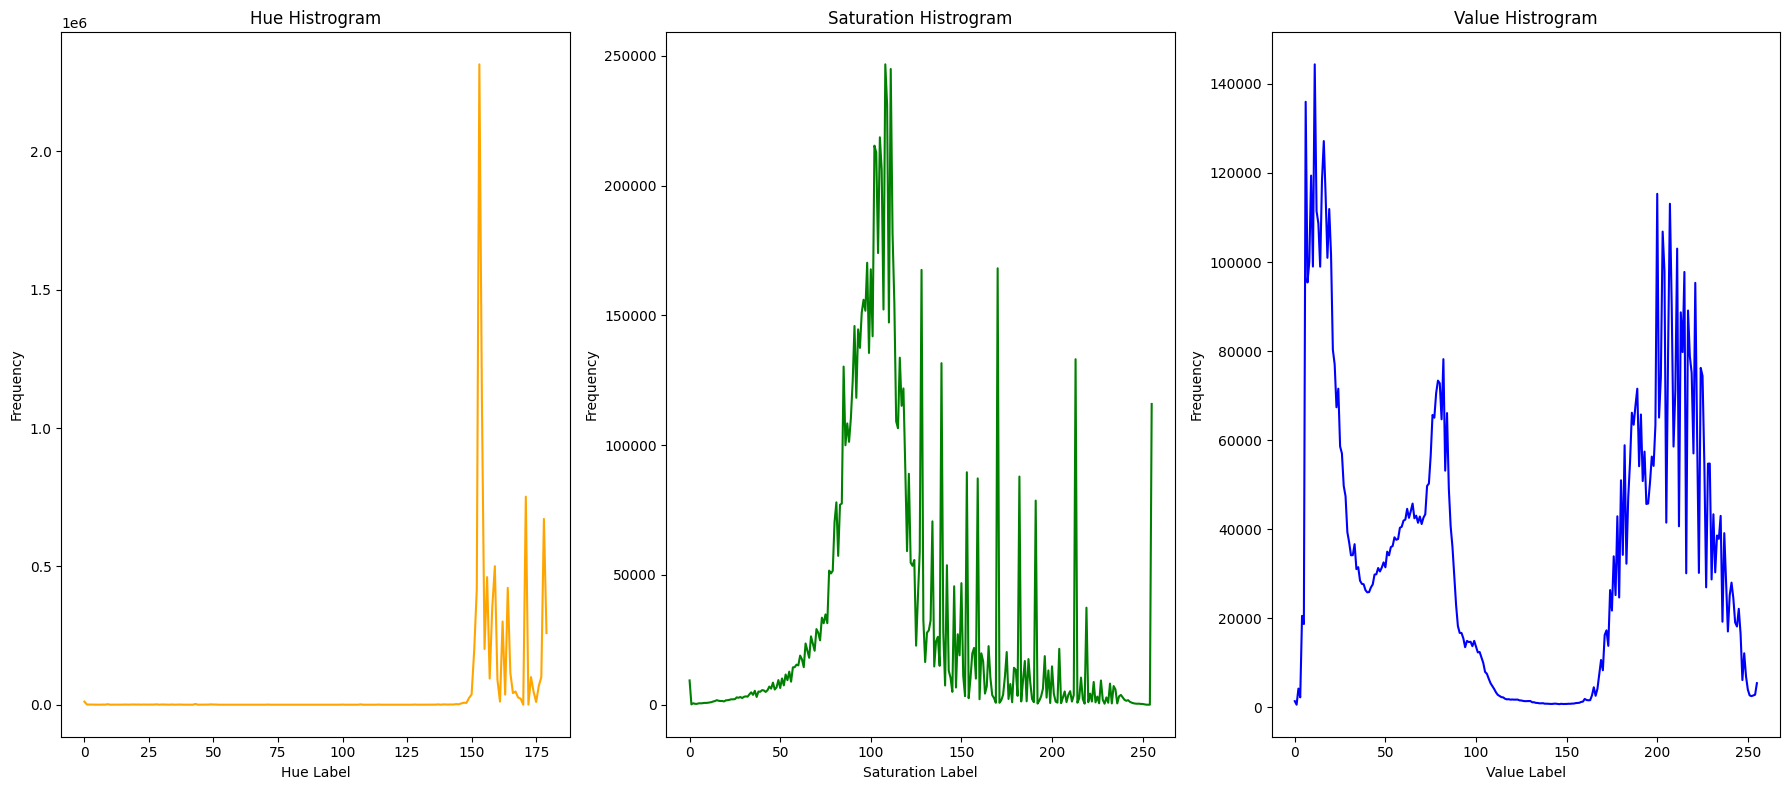

In [4]:
image = cv2.imread('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
image_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_HSV = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2HSV_FULL)

hue_hist = cv2.calcHist([image_HSV],[0],None,[180],[0,180])
sat_hist = cv2.calcHist([image_HSV],[1],None,[256],[0,256])
value_hist = cv2.calcHist([image_HSV],[2],None,[256],[0,256])

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.lineplot(x=np.arange(180),y=hue_hist[:,0],color='orange')
plt.title('Hue Histrogram')
plt.xlabel('Hue Label')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.lineplot(x=np.arange(256),y=sat_hist[:,0],color='green')
plt.title('Saturation Histrogram')
plt.xlabel('Saturation Label')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.lineplot(x=np.arange(256),y=value_hist[:,0],color='blue')
plt.title('Value Histrogram')
plt.xlabel('Value Label')
plt.ylabel('Frequency')
plt.tight_layout() ## Adjust for better spacing between subplot
plt.show()


### RGB Plot

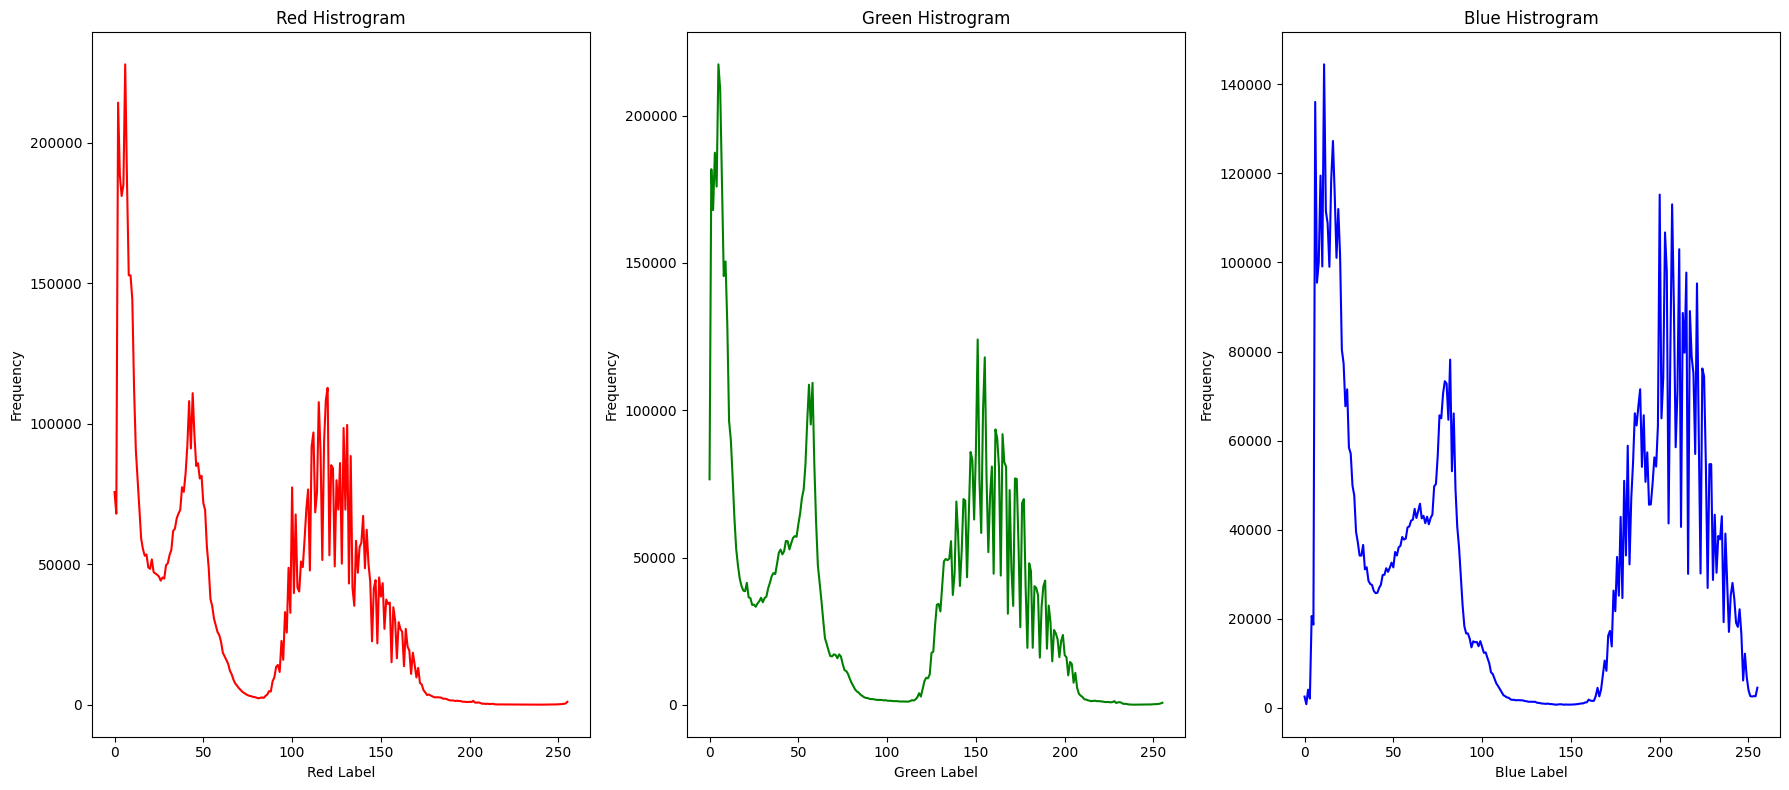

In [5]:
image = cv2.imread('Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r_hist = cv2.calcHist([image_RGB],[0],None,[256],[0,256])
g_hist = cv2.calcHist([image_RGB],[1],None,[256],[0,256])
b_hist = cv2.calcHist([image_RGB],[2],None,[256],[0,256])

plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.lineplot(x=np.arange(256),y=r_hist[:,0],color='red')
plt.title('Red Histrogram')
plt.xlabel('Red Label')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.lineplot(x=np.arange(256),y=g_hist[:,0],color='green')
plt.title('Green Histrogram')
plt.xlabel('Green Label')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.lineplot(x=np.arange(256),y=b_hist[:,0],color='blue')
plt.title('Blue Histrogram')
plt.xlabel('Blue Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Predict Warm vs Cool image

In [6]:
# image = cv2.imread('Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
# image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
def warmvscool(file):
    image = cv2.imread(file)
    image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hue = image_HSV[:,:,0]

    warm_mask = (hue>=0) & (hue<=60)
    cool_mask = (hue>=90) & (hue<=180)

    warm_percent = np.sum(warm_mask)/hue.size *100
    cool_percent = np.sum(cool_mask)/hue.size *100

    if warm_percent>cool_percent:
        prediction = 'Warm Image'
    else:
        prediction='Cool Image'

    print(f'Warm Percentage: {round(warm_percent,4)}')
    print(f'Cool Percentage: {round(cool_percent,4)}')
    return prediction

In [7]:
warmvscool('Temp/forest-5038025_1280.jpg')

Warm Percentage: 91.3567
Cool Percentage: 8.525


'Warm Image'

### Dull vs Bright Image Prediction

In [8]:
def dullvsbright(file):
    image = cv2.imread(file)
    image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

    saturation = image_HSV[:,:,1]
    value = image_HSV[:,:,2]

    saturation_threshold = 80
    value_threshold = 100

    dull_mask = (saturation<saturation_threshold)&(value<value_threshold)

    dull_percentage = np.sum(dull_mask)/saturation.size *100

    if dull_percentage>50:
        prediction = 'Dull Image'
    else:
        prediction = 'Bright Image'

    print(f'Dull Percentage: {round(dull_percentage,4)}')
    return prediction

In [9]:
dullvsbright('Temp/dull-5369074_1280.jpg')

Dull Percentage: 61.2816


'Dull Image'

### Color Thresholding

In [10]:
def color_thresholding(file):
    image=cv2.imread(file)
    image_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

    low_blue = np.array([80,0,50])
    high_blue = np.array([120,255,255])

    orange_image = np.zeros_like(image_RGB)
    orange_image[:,:]=[255,100,0]
    # plt.imshow(orange_image)
    

    mask = cv2.inRange(image_HSV,low_blue,high_blue)
    mask_not = cv2.bitwise_not(mask)

    result = cv2.bitwise_and(image_RGB,image_RGB,mask=mask)
    result2 = cv2.bitwise_and(image_RGB,image_RGB,mask=mask_not)
    orang_result = cv2.bitwise_and(orange_image,orange_image,mask=mask_not)
    result3 = result+orang_result


    return image_RGB,mask,result,result2,result3



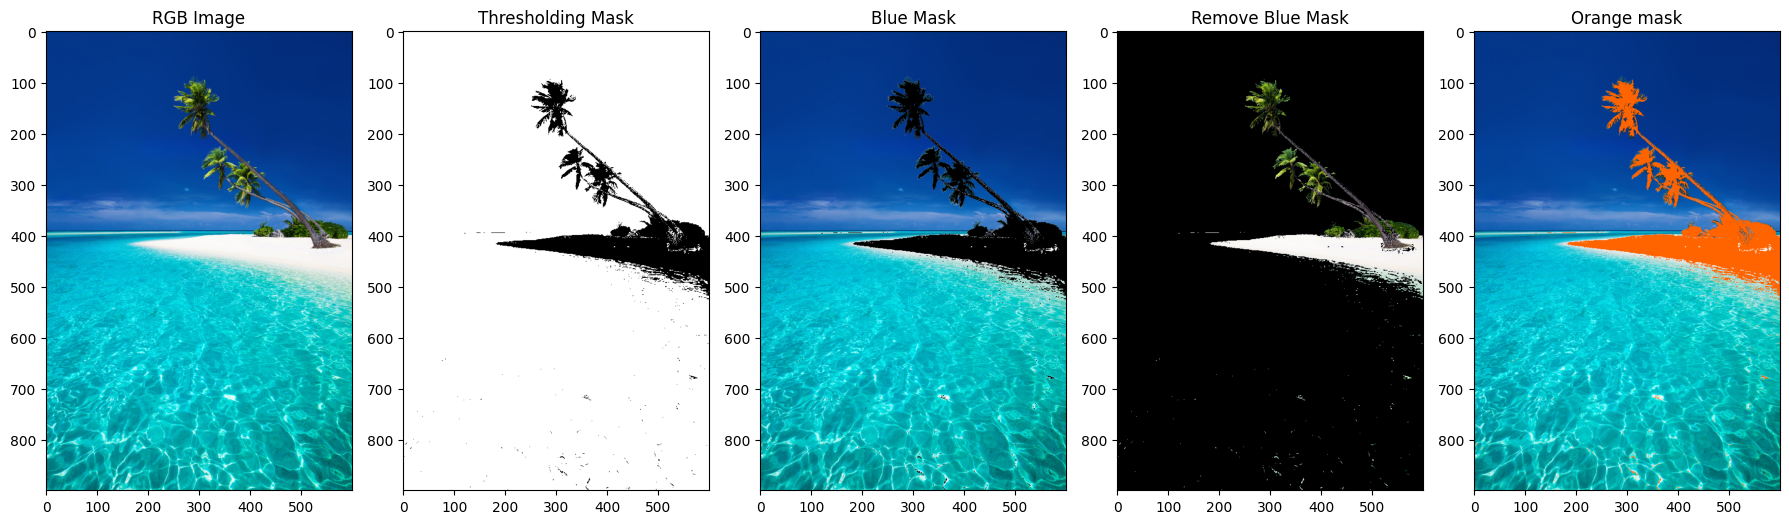

In [11]:
image_RGB,mask,result,result2,result3=color_thresholding('Temp/beach-blue.jpg')

plt.figure(figsize=(18,8))

plt.subplot(1,5,1)
plt.imshow(image_RGB)
plt.title('RGB Image')

plt.subplot(1,5,2)
plt.imshow(mask,cmap='gray')
plt.title('Thresholding Mask')

plt.subplot(1,5,3)
plt.imshow(result)
plt.title('Blue Mask')

plt.subplot(1,5,4)
plt.imshow(result2)
plt.title('Remove Blue Mask')

plt.subplot(1,5,5)
plt.imshow(result3)
plt.title('Orange mask')


plt.tight_layout()
plt.show()

### Contour

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

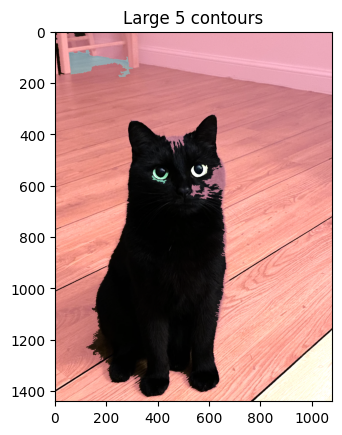

In [13]:
image = cv2.imread('Temp/selc1u0qivz41.webp')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_Gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image_Gray, 50, 100, cv2.THRESH_BINARY) 
contours,_ = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

image_filled_contour = np.zeros_like(image_RGB) ## Create an empty image

## Sorting contours by areas
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5] ## Taking top 5 contours

## Draw contours
for contour in contours:
    color = (np.random.randint(100,255),np.random.randint(100,255),np.random.randint(100,255))
    # color = (255,100,0)
    cv2.drawContours(image_filled_contour,[contour],-1,color,thickness=cv2.FILLED)

### cv2.addWeighted(src1,alpha,src2,beta,gamma)
### alpha is weightage of first image, beta is for second image and gamma is a brightness of final image

image_with_filled_contour = cv2.addWeighted(image_RGB,0.6,image_filled_contour,0.8,0.2)

plt.imshow(image_with_filled_contour)
plt.title('Large 5 contours')
plt.grid(False)
plt.show()




### Shaping on the Contours

In [14]:
def shape_contours(contour):
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True),True)

    if len(approx)==3:
        shape = 'Triangle'
    elif len(approx)==4:
        x,y,w,h = cv2.boundingRect(approx)
        aspect_ratio = float(w)/h
        shape = "Square" if aspect_ratio==1 else 'Rectangle'
    elif len(approx)==5:
        shape='Pentagon'
    elif len(approx)==6:
        shape='Hexagon'
    elif len(approx) > 6:
        shape = "Polygon"
    else:
        shape = 'Unknown'
    return (approx,shape)

In [15]:
image = cv2.imread('Temp/beach-blue.jpg')
Gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
RGB_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

_, thresh = cv2.threshold(Gray_image,120,180,cv2.THRESH_BINARY)
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

image_filled = np.zeros_like(image)

contours = sorted(contours,key=cv2.contourArea,reverse=True)[:1]

for contour in contours:
    approx,shape = shape_contours(contour)

    color = (255,0,0)
    cv2.drawContours(image_filled,[contour],-1,color,cv2.FILLED)

    cx,cy = int(np.mean(approx[:,0,0])),int(np.mean(approx[:,0,1]))
    text_position = (cx-150,cy-150)
    cv2.putText(image_filled,shape,text_position,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),5)

image_with_filled_contour = cv2.addWeighted(image_RGB,0.7,image_filled,0.8,0.2)
plt.imshow(image_with_filled_contour)



error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:661: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


### Draw Box on Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

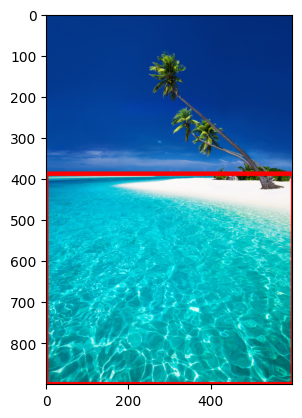

In [9]:
image = cv2.imread('Temp/beach-blue.jpg')
RGBimage = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
Grayimage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_,thresh = cv2.threshold(Grayimage,120,150,cv2.THRESH_BINARY)

contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

image_filled = np.zeros_like(image)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:1]

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(RGBimage,(x,y),(x+w,y+h),(255,0,0),10)

plt.imshow(RGBimage)